In [117]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Parameters

In [118]:
np.random.seed(521)

class_means = np.array([[+0.0, +2.5],
                        [-2.5, -2.0],
                        [+2.5, -2.0]])
class_covariances = np.array([[[+3.2, +0.0],
                               [+0.0, +1.2]],
                              [[+1.2, +0.8],
                               [+0.8, +1.2]],
                              [[+1.2, -0.8],
                               [-0.8, +1.2]]])

class_sizes = np.array([120, 80, 100])

## Generate Data

In [119]:
points1 = np.random.multivariate_normal(class_means[0, :], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1, :], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2, :], class_covariances[2,:,:], class_sizes[2])

X = np.vstack((points1, points2, points3))
y_truth = np.concatenate((np.repeat(1, class_sizes[0]), 
                   np.repeat(2, class_sizes[1]),
                   np.repeat(3, class_sizes[2]))).astype(int)
K = np.max(y_truth)
N = X.shape[0]
D = X.shape[1]

Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth - 1] = 1

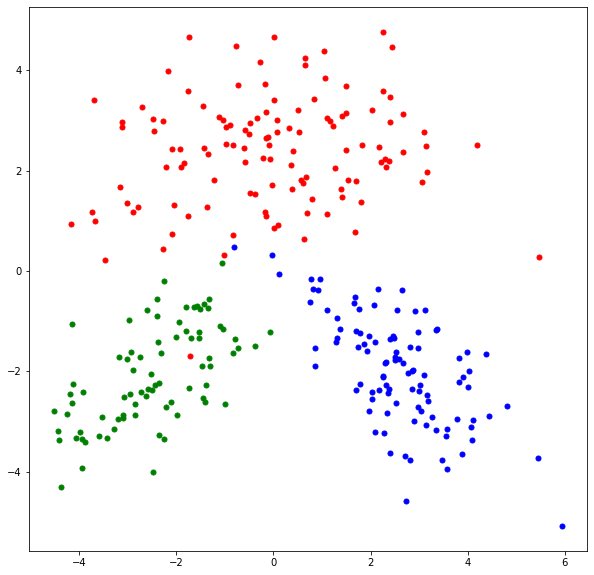

In [120]:
plt.figure(figsize = (10,10))
plt.plot(points1[:, 0], points1[:, 1], "r.", markersize = 10 )
plt.plot(points2[:, 0], points2[:, 1], "g.", markersize = 10 )
plt.plot(points3[:, 0], points3[:, 1], "b.", markersize = 10 )
plt.show()

## Sigmoid Function

In [130]:
def sigmoid(X, W, w0):
    return np.array(1 / (1 + np.exp([-(np.matmul(X, W[:,c]) + w0[:,c]) for c in range(K)]))).T



In [136]:
def gradient_w0(Y_truth, Y_predicted):
    return (np.asarray([(-np.sum((Y_truth - Y_predicted) * Y_predicted * (1 - Y_predicted) , axis = 0))]))
                        

def gradient_W(X, Y_truth, Y_predicted):
    return(np.transpose(np.asarray([-np.sum(np.repeat((Y_truth[:,c] - Y_predicted[:,c])[:, None], X.shape[1], axis = 1) *
                               np.repeat((Y_predicted[:,c]) [:, None], X.shape[1], axis = 1)*
                               np.repeat((1 - Y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)
               ])))

 
    
    

## Learning Parameters

In [137]:
eta = 0.01
epsilon = 0.001

## Parameter Estimation

In [138]:
np.random.seed(521)
W = np.random.uniform(low = -0.01, high = 0.01, size = (X.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))


## Iterative Algorithm

In [139]:
# learn W and w0 using gradient descent
#
iteration = 1
objective_values = []

while 1:
    Y_predicted = sigmoid(X, W, w0)

    objective_values = np.append(objective_values, np.sum(0.5*(Y_truth - Y_predicted)**2)) 

    W_old = W
    w0_old = w0
    W = W - eta * gradient_W(X, Y_truth, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break
    
    iteration = iteration + 1
print(W)
print(w0)

[[ 0.02528117 -2.23729296  2.44057308]
 [ 4.6079024  -2.46097432 -2.26881566]]
[[-1.13651535 -4.28418421 -3.60810854]]


In [140]:
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        117   1   3
2          2  78   0
3          1   1  97


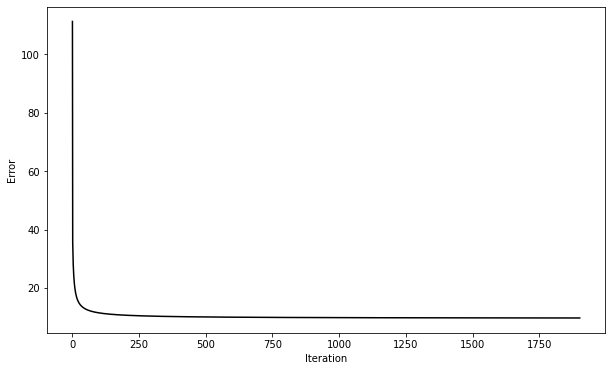

In [141]:

plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Visualization 

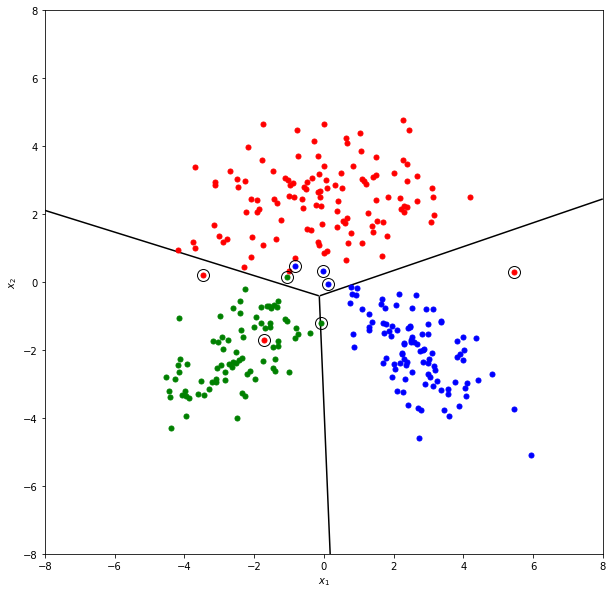

In [107]:
#visulaizing data
x1_interval = np.linspace(-8, +8, 1201)
x2_interval = np.linspace(-8, +8, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = W[0, c] * x1_grid + W[1, c] * x2_grid + w0[0, c]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()